# Introduction to scikit-learn
this notebook demonstrates some of the most useful functions of the beautiful scikit-learn library.
what we're going to cover:
0. An end-to-end Scikit-learn workflow
1. getting the data ready
2. choose the right estimator/algorithm for our problems
3. fit the model/algorithm and use it to maker predictions on our data
4. evaluating a model
5. improve a model
6. save and load a trained model
7. putting it all together!

Introduction to Scikit learn (sklearn)
this notebook demonstrates some of the most useful functions of the beautiful Scikit learn library.

what we're going to cover

In [1]:
#lets listify the contents
what_were_covering=[
    "0. An end-to-end Scikit-learn workflow",
    "1. getting the data ready",
    "2. choose the right estimator/algorithm for our problems",
    "3. fit the model/algorithm and use it to maker predictions on our data",
    "4. evaluating a model",
    "5. improve a model",
    "6. save and load a trained model",
    "7. putting it all together!"]

In [2]:
what_were_covering

['0. An end-to-end Scikit-learn workflow',
 '1. getting the data ready',
 '2. choose the right estimator/algorithm for our problems',
 '3. fit the model/algorithm and use it to maker predictions on our data',
 '4. evaluating a model',
 '5. improve a model',
 '6. save and load a trained model',
 '7. putting it all together!']

In [3]:
#standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import numpy as np

##0. an end-to-end scikit-learn workflow

In [5]:
# 1. get the data ready
import pandas as pd
heart_disease= pd.read_csv('data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
#create X(features matrix)
x=heart_disease.drop("target",axis=1)

#create y(labels)
y=heart_disease["target"]

In [7]:
#2. choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

#we'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
#3, fit the model to the training data
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test=train_test_split(x, y, test_size=0.2)

In [9]:
clf.fit(x_train,y_train);

In [10]:
#make a prediction
y_label=clf.predict(np.array([0,2,3,4]))

C:\Users\igloo\Documents\deep learning projects\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [11]:
y_preds=clf.predict(x_test)
y_preds

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [12]:
y_test

294    0
107    1
269    0
229    0
8      1
      ..
143    1
105    1
288    0
80     1
100    1
Name: target, Length: 61, dtype: int64

In [13]:
#4. evaluate the model on the training data and test data
clf.score(x_train, y_train)

1.0

In [14]:
clf.score(x_test, y_test)

0.8032786885245902

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [16]:
confusion_matrix(y_test, y_preds)

array([[21,  7],
       [ 5, 28]], dtype=int64)

In [17]:
accuracy_score(y_test, y_preds)

0.8032786885245902

In [18]:
#5. improve a model
#try different amount of n_estimators
np.random.seed(42)
for i in range (10,100,10):
    print(f"Trying model with {i} estimators..")
    clf=RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set:{clf.score(x_test, y_test)*100:0.2f}%")
    print("")

Trying model with 10 estimators..
Model accuracy on test set:81.97%

Trying model with 20 estimators..
Model accuracy on test set:80.33%

Trying model with 30 estimators..
Model accuracy on test set:80.33%

Trying model with 40 estimators..
Model accuracy on test set:83.61%

Trying model with 50 estimators..
Model accuracy on test set:80.33%

Trying model with 60 estimators..
Model accuracy on test set:80.33%

Trying model with 70 estimators..
Model accuracy on test set:81.97%

Trying model with 80 estimators..
Model accuracy on test set:83.61%

Trying model with 90 estimators..
Model accuracy on test set:78.69%



In [19]:
#6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl","wb"))

In [20]:
loaded_model= pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(x_test, y_test)

0.7868852459016393

## 1. Getting our data ready to be used with machine learning

three main things we have to do:
1. Split the data into features and labels(usually "x" &"y")
2. Filling (also called imputung) or disregarding missing values
3. Converting non-numberical values to numberical values (also called feature encoding)

In [21]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
x=heart_disease.drop("target",axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
y=heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [24]:
#Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=0.2)

In [25]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [26]:
x.shape[0]*0.8

242.4

In [27]:
242+61

303

In [28]:
len(heart_disease)

303

1.1 Make sure it all numerical

In [29]:
car_sales=pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [30]:
len(car_sales)

1000

In [31]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [32]:
#split the data in x and y
x=car_sales.drop("Price",axis=1)
y=car_sales["Price"]

#split into training and test
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [33]:
#build machine learning model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [34]:
#turn the categories to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

catergorical_features = ["Make", "Colour","Doors"]
one_hot=OneHotEncoder()
transformer= ColumnTransformer([("one_hot",
                                 one_hot,
                                 catergorical_features)],
                               remainder="passthrough")
transformed_x= transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [35]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [36]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [37]:
dummies=pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [38]:
#lets refit the model
np.random.seed(42)
x_train, x_test, y_train, y_test=train_test_split(transformed_x,
                                                 y,
                                                 test_size=0.2)
model.fit(x_train, y_train)

RandomForestRegressor()

In [39]:
model.score(x_test, y_test)

0.3235867221569877

1.2 What if there were missing values?

1. fill them with some value (also known as imputation).
2. remove the samples with missing data altogether.

In [40]:
#import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [41]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [42]:
#create x and y
x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [43]:
#lets try and covert our data into numbers
#turn the categories to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

catergorical_features = ["Make", "Colour","Doors"]
one_hot=OneHotEncoder()
transformer= ColumnTransformer([("one_hot",
                                 one_hot,
                                 catergorical_features)],
                               remainder="passthrough")
transformed_x= transformer.fit_transform(x)
transformed_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [44]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


### option 1. fill missing data with pandas

In [45]:
#fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

#fill the colour column
car_sales_missing["Colour"].fillna("missing",inplace=True)

#fill teh "oOdometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

#fill the "doors" columns
car_sales_missing["Doors"].fillna(4, inplace=True)

In [46]:
#check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [47]:
#remove the rows with missing price value
car_sales_missing.dropna(inplace=True)

In [48]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [49]:
len(car_sales_missing)

950

In [50]:
x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [51]:
#turn the categories to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

catergorical_features = ["Make", "Colour","Doors"]
one_hot=OneHotEncoder()
transformer= ColumnTransformer([("one_hot",
                                 one_hot,
                                 catergorical_features)],
                               remainder="passthrough")
transformed_x= transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### option 2. fill missing values with scikit learn

In [52]:
car_sales_missing=pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [53]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [54]:
#Drop the row with no labels
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [55]:
#split into x any y
x= car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [56]:
#Fill missing values with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#fill Categorical values with "missing " and numberical values with mean
cat_imputer=SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean")

#define columns
cat_features=["Make", "Colour"]
door_features=["Doors"]
num_features=["Odometer (KM)"]

#Create an imputer (something that fills missing data)
imputer= ColumnTransformer([
    ("cat_imputer", cat_imputer,cat_features),
    ("door_imputer",door_imputer, door_features),
    ("num_imputer",num_imputer,num_features)
])

#trasnform the data
filled_x=imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [57]:
car_sales_filled=pd.DataFrame(filled_x,columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [58]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [59]:
#lets try and convert our data to numbers
#turn the categories to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

catergorical_features = ["Make", "Colour","Doors"]
one_hot=OneHotEncoder()
transformer= ColumnTransformer([("one_hot",
                                 one_hot,
                                 catergorical_features)],
                               remainder="passthrough")
transformed_x= transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [60]:
#now we've got our data as numbers and filled (no missing values)
#lets fit the model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(transformed_x, y, test_size=0.2)

model=RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.21990196728583944

In [61]:
len(car_sales_filled), len(car_sales)

(950, 1000)

In [62]:
Note: the 50 less valurs in the transformed data is because we dropped the rows (50 total) with missing values

SyntaxError: invalid syntax (209162200.py, line 1)

## 2. choosing the right estimator/algorithm for your problem

some things to note:

* sklearn refers to machine learning models, algorithms as estimators.
* Classification problem - predicting a category (heart disease or not)
    * Sometimes you'll see "clf"(short for classifier) used as a classification estimator
* Regression problem- predicting a number (selling price of a car )

if your working on machine learning problem and looking to use Sklearn and not sure what model you should use, refer to the sklearn machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for a regression problem

lets use the california housing dataset.https://scikit-learn.org/stable/datasets/real_world.html

In [63]:
#get california housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [64]:
housing_df=pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [65]:
housing_df["target"]=housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [66]:
housing_df=housing_df.drop("MedHouseVal",axis=1)

KeyError: "['MedHouseVal'] not found in axis"

In [ ]:
housing_df

In [67]:
# Import algorithm
from sklearn.linear_model import Ridge
#setup random seed
np.random.seed(42)

#create the data
x=housing_df.drop("target", axis=1)
y=housing_df["target"]#median house price in $100,000s

#split into train and test sets
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)

#instantiate and fit the model (on the training set)
model= Ridge()
model.fit(x_train, y_train)

#check the score of the model(on the test set)
model.score(x_test, y_test)

0.5758549611440131

what if "Ridge" didnt worjk or the score didnt fit our needs?

well, we could always try a different model

how aboput we try an ensemble model ( an ensemble is a combination of small models to try and make better predictions than just a single model)

sklearn's ensemble models can be found here: 

In [68]:
#import the randomforestregressor model from the ensemble module
from sklearn.ensemble import RandomForestRegressor

#Setup random seed
np.random.seed(42)

#Create the data 
x=housing_df.drop("target",axis=1)
y=housing_df["target"]

#split into train and test sets
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2)

#create random forest model
model= RandomForestRegressor()
model.fit(x_train, y_train)

# Check the score of the model (on the test set)
model.score(x_test, y_test)

0.8065734772187598

## 2.2 Picking a machine learning model for a classification problem
Choosing an estimator for a classification problem

let's go to map...


In [69]:
heart_disease= pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [70]:
len(heart_disease)

303

Consulting the map and it says try `LinearSVC`

In [71]:
#import the linearsvc estimator class
from sklearn.svm import LinearSVC

#setup random seed
np.random.seed(42)

#make the data
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

#split the data
x_train,x_test, y_train, y_test= train_test_split(x,y, test_size=0.2)

#instantiate linearsvc
clf=LinearSVC(dual=False)
clf.fit(x_train, y_train)

#evaluate the linearsvc
clf.score(x_test, y_test)

0.8688524590163934

In [72]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [73]:
#import the RandonForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#make the data
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

#split the data
x_train,x_test, y_train, y_test= train_test_split(x,y, test_size=0.2)

#instantiate RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train, y_train)

#evaluate the RandomForestClassifier
clf.score(x_test, y_test)

0.8524590163934426

Tidbit:

    1. if you have structured data, used ensemble methods
    2. if you have unstructured data, use deep learning or transfer learning

In [74]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 3. fit the model/aklgorithm on our data and use to make predections

## 3.1. fitting the model to the data

* x=features, features variables, data
* y = labels, targets, target variables

In [75]:
#import the RandonForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#make the data
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

#split the data
x_train,x_test, y_train, y_test= train_test_split(x,y, test_size=0.2)

#instantiate RandomForestClassifier
clf=RandomForestClassifier()

#fit the model to the data (training the machine learning model)
clf.fit(x_train, y_train)

#evaluate the RandomForestClassifier (use the patterns the model has learned)
clf.score(x_test, y_test)

0.8524590163934426

### 3.2 make prediction using a machine learning model

2ways to make predictions:

1. `predict()`
2. `predict_proba()`

In [76]:
# use a trained model to make predictions
clf.predict(np.array([1,7,8,1,6,4,5]))# this doesnt work

C:\Users\igloo\Documents\deep learning projects\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 1. 6. 4. 5.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [77]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [78]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [79]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [80]:
# compare predections to truth labels to evaluate the model
y_preds=clf.predict(x_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [81]:
clf.score(x_test, y_test)

0.8524590163934426

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

make predictions with predict_proba()

In [83]:
#predict_proba returns probabilities of a classification label
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [84]:
#lets predict on the same data..
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

`predict()` can also be used for regression models.

In [85]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [86]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#create the data
x=housing_df.drop("target", axis=1)
y=housing_df["target"]

#split into training and test sets
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

#create model instance
model=RandomForestRegressor()

#fit the modle to the data
model.fit(x_train, y_train)

#make predictions
y_preds=model.predict(x_test)

In [87]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [88]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [89]:
# compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

In [90]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-learn models/estimators:

    1. Estimator's build-in `score()` method
    2. the `scoring` parameter
    3. Problem-specific metric functions

you can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with score method

In [91]:
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#create x and y
x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

#create train/test
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

#create a classifier model instance

model=RandomForestRegressor(n_estimators=1000)

#fit classifier to training data

model.fit(x_train, y_train);

In [92]:
#the highest value for the .score() model is 1.0 the lowest is 0.0
model.score(x_train, y_train)

0.9248207644340208

In [93]:
clf.score(x_test,y_test)

0.8524590163934426

lets use the score() on our regression problem..

In [94]:
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#create x and y
x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

#create train/test
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

#create a classifier model instance

model=RandomForestRegressor(n_estimators=50)

#fit classifier to training data

model.fit(x_train, y_train);

In [95]:
#the default score() evaluation metric is r_squared for regression algorithms
#highest = 1.0, lowest= 0.0
model.score(x_test, y_test)

0.5483896551724138

### 4.2 Evaluateing a model using the scoring parameter

In [96]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#create x and y
x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

#create train/test
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

#create a classifier model instance

model=RandomForestRegressor(n_estimators=100)

#fit classifier to training data

model.fit(x_train, y_train);

In [97]:
model.score(x_test, y_test)

0.5106393318965518

In [98]:
cross_val_score(model, x, y)

array([0.        , 0.        , 0.35421964, 0.        , 0.        ])

In [99]:
np.random.seed(42)

#single training and test split score 
model_single_score = model.score(x_test, y_test)

#take the mean of 5-fold cross-validation score
model_cross_val_score=np.mean(cross_val_score(clf, x, y, cv=5))

#compare the 2
model_single_score, model_cross_val_score

(0.5106393318965518, 0.8248087431693989)

In [100]:
#Defalut scoring parameter of classifier = mean accuracy
model.score()

TypeError: RegressorMixin.score() missing 2 required positional arguments: 'X' and 'y'

In [101]:
#scoring parameter set to None by default
cross_val_score(model,x, y, cv=5, scoring=None)

array([0.        , 0.        , 0.34075866, 0.        , 0.        ])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

* Accuracy

In [102]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [103]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier()
cross_val_score=cross_val_score(clf,x,y,cv=5)

In [104]:
np.mean(cross_val_score)

0.8248087431693989

In [105]:
print(f"Heart Disease Classifier cross-validated Accuracy: {np.mean(cross_val_score)*100:2f}%")

Heart Disease Classifier cross-validated Accuracy: 82.480874%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* Roc curve

ROC curves are a comparision of a model's true positive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model prodicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [106]:
#create x_test ... etc
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [107]:
from sklearn.metrics import roc_curve

#fit the classifier
clf.fit(x_train, y_train)

#make predictions with probabilities
y_probs= clf.predict_proba(x_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [108]:
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [109]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds=roc_curve(y_test, y_probs_positive)

#cheak the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

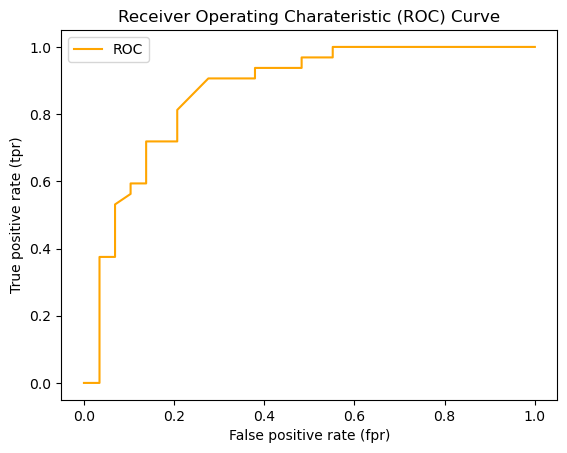

In [116]:
#create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    PLots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    #plot roc curve
    plt.plot(fpr,tpr,color="orange", label="ROC")
    # plot line with no predictive power (baseline)
    #plt.plot([0,1],[0,1], color="darkblue",linestyle="--",label="Guessing")

    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Charateristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [115]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

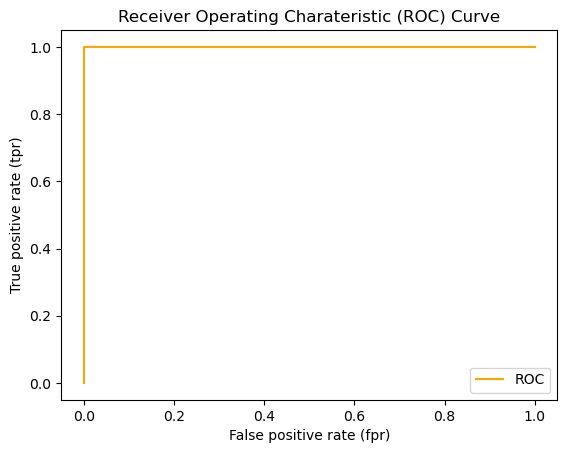

In [118]:
#plot perfect ROC curve and AUC score
fpr, tpr, threshold= roc_curve(y_test,y_test)
plot_roc_curve(fpr, tpr)

In [119]:
#perfet AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion matrix**

A confusion matrix is a quick wat to compare the labels a model predicts and the actutal labels it was supposed to predict.
In essence, giving you an idea of where the model is getting confused

In [121]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [122]:
#visualize confuaion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [124]:
22+7+8+24

61

In [135]:
!pip install seaborn

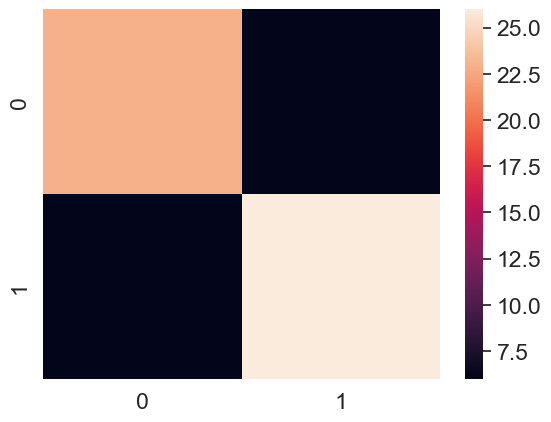

In [136]:
#make our confusin matrix more visual with seaborn's heatmap()
import seaborn as sns

#set the font scale
sns.set(font_scale=1.5)

#create a confusion matrix
conf_mat=confusion_matrix(y_test, y_preds)

#plot it using searborn
sns.heatmap(conf_mat);

**confuaion matrix**

the next way to evaluate a classification model is by using a confusion matric. A confuaion matric is a quick way to compare teh labels a model predicts and the actual labels it was supposed ti predict. In essence, this gives you an idea of where the model is getting confusion


In [138]:
from sklearn.metrics import confusion_matrix

y_preds=clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

### creating a confusion matrix using Scikitlearn

to use the new methods of creating a confusion matrix with Scikit-learn you will need sklearn version 1.0+

In [141]:
import sklearn
sklearn.__version__

'1.3.0'

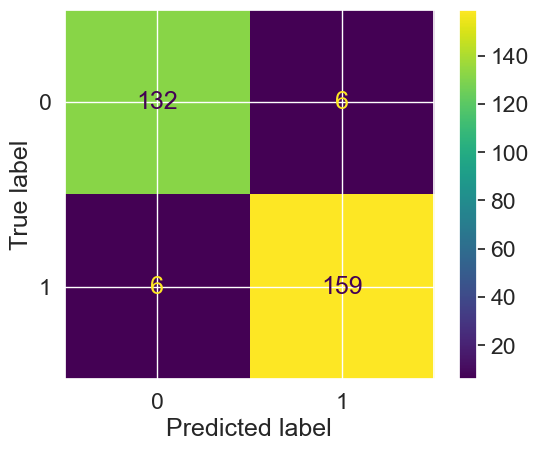

In [145]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=x, y=y)

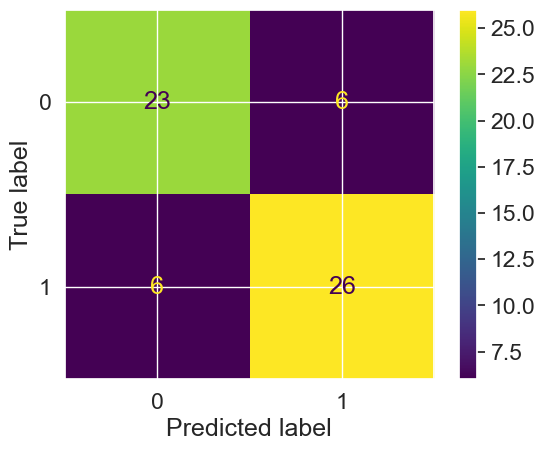

In [146]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=y_preds)

**Classification Report**

In [148]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [150]:
#where presion and recall become valuable
disease_true = np.zeros(10000)
disease_true[0]=1# only one positive case

disease_preds=np.zeros(10000) #model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

C:\Users\igloo\Documents\deep learning projects\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\igloo\Documents\deep learning projects\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\igloo\Documents\deep learning projects\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation metrics

the ones we're going to cover are:

1. R^2 (pronounced r-squared) or coeffiecient of determination
2. mean absolute error (MAE)
3. mean squared error (MSE)
   

In [152]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x=housing_df.drop("target", axis=1)
y=housing_df["target"]

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)

model= RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)

RandomForestRegressor()

In [154]:
model.score(x_test, y_test)

0.8065734772187598

In [155]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [156]:
y_test.mean()

2.0550030959302323

In [158]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [159]:
from sklearn.metrics import r2_score

#fill an array with y_test mean
y_test_mean=np.full(len(y_test), y_test.mean())

In [160]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [162]:
r2_score(y_true=y_test,
        y_pred=y_test_mean)

0.0

In [163]:
r2_score(y_true=y_test,
        y_pred=y_test)

1.0

***mean absolute error (MAE)***
mean is the average of the absolute differences between predictions and actual values.
it gives you an idea of hoe wrong your models predictions are.

In [165]:
#MAE
from sklearn.metrics import mean_absolute_error

y_preds=model.predict(x_test)
mae=mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [166]:
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [167]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [170]:
df=pd.DataFrame(data={"actual values":y_test,
                     "predicted values": y_preds})
df["differences"]=df["predicted values"]- df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [173]:
#mas using formulas and differences
np.abs(df["differences"]).mean()

0.32659871732073664

**mean sqaured error**

mse is the mean square of the error between actual and predicted values

In [174]:
# Mean squared error(mse)
from sklearn.metrics import mean_squared_error

y_preds= model.predict(x_test)
mse= mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [175]:
df["squared_differences"]=np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [186]:
#calcualte mse by hand
squared= np.square(df["differences"])
squared.mean()

0.2534678520824551

In [187]:
df_large_error=df.copy()
df_large_error.iloc[0]["squared_differences"]=16

In [188]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [189]:
#calculate mse with large error

df_large_error["squared_differences"].mean()

0.2573437523766412

In [190]:
df_large_error.iloc[1:100]=20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [192]:
#calculate mse with large error

df_large_error["squared_differences"].mean()

0.7334180712088106

### 4.2.3 Finally using the scoring parameter

In [194]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier(n_estimators=100)

In [196]:
np.random.seed(42)

#cross-validation accuracy
cv_acc=cross_val_score(clf, x, y, cv=5, scoring=None) #if scoring =None, estimators defalut scoring evatuation metric
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [197]:
#cross validated accuracy 

print(f"the cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

the cross-validated accuracy is: 82.48%


In [199]:
np.random.seed(42)

cv_acc=cross_val_score(clf, x, y, cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [200]:
#cross-validated accuracy
print(f"the cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

the cross-validated accuracy is: 82.48%


In [202]:
#precision
cv_precision= cross_val_score(clf, x,y,cv=5,scoring="precision")
cv_precision

array([0.80555556, 0.90322581, 0.83870968, 0.78787879, 0.76923077])

In [204]:
#cross-validated precision
print(f"the cross-validated precision is: {np.mean(cv_precision)*100:.2f}%")

the cross-validated precision is: 82.09%


In [205]:
# recall
cv_recall= cross_val_score(clf,x, y,cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.84848485])

In [206]:
#cross-validated recall
print(f"the cross-validated accuracy is: {np.mean(cv_recall)*100:.2f}%")

the cross-validated accuracy is: 84.85%


lets see the "scoring parameters being using a regression model"

In [207]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x=housing_df.drop("target",axis=1)
y=housing_df["target"]

model=RandomForestRegressor(n_estimators=100)

In [208]:
np.random.seed(42)
cv_r2=cross_val_score(model, x,y, cv=3, scoring=None)
np.mean(cv_r2)

0.6545458023124507

In [209]:
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [215]:
#mean absolute error
cv_mae= cross_val_score(model,x, y,cv=5,scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.4648900672529071

In [216]:
#mean squared error
cv_mse= cross_val_score(model,x, y,cv=5,scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.43056266950079847

In [217]:
cv_mae

array([-0.54243648, -0.40656038, -0.43800615, -0.46333592, -0.47411141])

In [218]:
cv_mse

array([-0.51869435, -0.34901694, -0.37285132, -0.4457963 , -0.46645444])

# 4.3 using different evaluation metrics as scikit-learn function
the 3rd way to evaluate scikit-learn machnine learning models/estimators is to using the sklearn.metrics module

In [226]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)
#create x&y
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

#split data
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
#create model
clf=RandomForestClassifier()
#fit model
clf.fit(x_train, y_train)
#make predictions
y_preds=clf.predict(x_test)
#evaluation model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accurracy:{accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision:{precision_score(y_test, y_preds)}")
print(f"Recall:{recall_score(y_test, y_preds)}")
print(f"F1:{f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accurracy:85.25%
Precision:0.8484848484848485
Recall:0.875
F1:0.8615384615384615


In [231]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)
#create x&y
x=housing_df.drop("target",axis=1)
y=housing_df["target"]

#split data
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2)
#create model
model=RandomForestRegressor()
#fit model
model.fit(x_train,y_train)
#make predictions
y_preds=model.predict(x_test)
#evaluation model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 score:{r2_score(y_test, y_preds)}")
print(f"MAE score:{mean_absolute_error(y_test, y_preds)}")
print(f"R2 score:{mean_squared_error(y_test, y_preds)}")


Regression metrics on the test set
R2 score:0.8065734772187598
MAE score:0.32659871732073664
R2 score:0.2534678520824551


In [232]:
what_were_covering

['0. An end-to-end Scikit-learn workflow',
 '1. getting the data ready',
 '2. choose the right estimator/algorithm for our problems',
 '3. fit the model/algorithm and use it to maker predictions on our data',
 '4. evaluating a model',
 '5. improve a model',
 '6. save and load a trained model',
 '7. putting it all together!']

## 5. improving a model

first predictions = baseline predictions
first model= baseline model

from a data perspective
* could we collect more data?(generally, the more data, the better)
* could we improve our data?

from a models prespective:
* is there a better model that can be used?
*  could we improve the current model?

## hyperparameters vs parameters
parameters= models find these patterns in data
hyperparameters = settings on the model you can adjust to (potentially) imporve its ability to find patterns

three ways to adjust hyperparameters
1. by hand
2. randomly with randomsearchcv
3. exhaustively with gridsearchcv

In [237]:
from sklearn.ensemble import RandomForestClassifier

clf= RandomForestClassifier(n_estimators=100)

In [238]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 5.1 Tuning hyperparameters by hand

lets make 3 sets traing, validation and test.

we're going to try and adjust:

* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [277]:
def evaluate_preds(y_true, y_preds):
    """
    performs evaluation comparision on y_true labels vs y_pred lebels
    on a classification.
    """
    accuracy=accuracy_score(y_true, y_preds)
    precision= precision_score(y_true, y_preds)
    recall=recall_score(y_true, y_preds)
    f1=f1_score(y_true, y_preds)
    metric_dict={"accuracy": round(accuracy, 2),
                 "precision": round(precision, 2),
                 "recall": round(recall, 2),
                 "f1": round(f1, 2)}
    print(f"Acc: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [278]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#shuffle the data
heart_disease_shuffled= heart_disease.sample(frac=1)

#split into x and y
x= heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

#split the data into train, validation and test sets
train_split=round(0.7*len(heart_disease_shuffled))#70 of data
valid_split=round(train_split+0.15*len(heart_disease_shuffled))#15% of data
x_train, y_train=x[:train_split],y[:train_split]
x_valid, y_valid=x[train_split:valid_split],y[train_split:valid_split]
x_test, y_test=x[valid_split:],y[valid_split:]

clf= RandomForestClassifier()
clf.fit(x_train, y_train)

#make a prediction
y_preds=clf.predict(x_valid)

#evaluate the classifier on validation set
baseline_metrics=evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 75.56%
Precision: 0.73
Recall: 0.76
F1 score: 0.74


{'accuracy': 0.76, 'precision': 0.73, 'recall': 0.76, 'f1': 0.74}

In [279]:
np.random.seed(42)

#create a second classifier with different hyperparameters
clf_2= RandomForestClassifier(n_estimators=100)
clf_2.fit(x_train, y_train)

#make predictiosn with different hyperparameters
y_preds_2=clf_2.predict(x_valid)

#evalute the 2nd classifier
clf_2_metrics=evaluate_preds(y_valid, y_preds_2)

Acc: 80.00%
Precision: 0.75
Recall: 0.86
F1 score: 0.80


In [280]:
clf_3=RandomForestClassifier(n_estimators=100,
                            max_depth=10)
clf_3.fit(x_train, y_train)
#make predictiosn with different hyperparameters
y_preds_3=clf_3.predict(x_valid)

#evalute the 2nd classifier
clf_3_metrics=evaluate_preds(y_valid, y_preds_3)

Acc: 75.56%
Precision: 0.73
Recall: 0.76
F1 score: 0.74


### 5.2 Hyperparameter tuninh with randomized searchcv

In [283]:
from sklearn.model_selection import RandomizedSearchCV

grid={"n_estimators":[10,100,200,500,1000,1200],
     "max_depth":[None,5,10,20,30],
     "max_features":["auto","sqrt"],
     "min_samples_split":[2,4,6],
     "min_samples_leaf":[1,2,4]}

np.random.seed(42)

#split into x and y

x=heart_disease_shuffled.drop("target", axis=1)
y=heart_disease_shuffled["target"]

#split into train and test sets
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

#instantiate RandomForestClassifier
clf=RandomForestClassifier(n_jobs=None)

#setip randomizedsearchcv
rs_clf=RandomizedSearchCV(estimator=clf,
                         param_distributions=grid,
                         n_iter=10,#number pf models to try
                         cv=5,
                         verbose=2)

#fit teh randromizedsearchcv version
rs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

C:\Users\igloo\Documents\deep learning projects\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\igloo\Documents\deep learning projects\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\igloo\Documents\deep learning projects\env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\igloo\Documents\deep learning projects\env\lib\site-packages\sklearn\base.py", line 637,

In [284]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [285]:
#make predictions with the best hyperparameters
rs_y_preds=rs_clf.predict(x_test)

#evaluate the predictions
rs_metrics=evaluate_preds(y_test, rs_y_preds)

Acc: 80.33%
Precision: 0.82
Recall: 0.82
F1 score: 0.82


## 5.3 hyperparameter tuning with gridsearchcv


In [286]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [287]:
grid_2={'n_estimators': [100, 200, 500],
        'max_depth': [None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [ 6],
        'min_samples_leaf': [1, 2]}

In [289]:
from sklearn.model_selection import GridSearchCV,  train_test_split

np.random.seed(42)

#split into x and y

x=heart_disease_shuffled.drop("target", axis=1)
y=heart_disease_shuffled["target"]

#split into train and test sets
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

#instantiate RandomForestClassifier
clf=RandomForestClassifier(n_jobs=None)

#setup gridsearchcv
gs_clf=GridSearchCV(estimator=clf,
                    param_grid=grid_2,
                    cv=5,
                    verbose=2)

#fit the gridsearchcv version
gs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

C:\Users\igloo\Documents\deep learning projects\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\igloo\Documents\deep learning projects\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\igloo\Documents\deep learning projects\env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\igloo\Documents\deep learning projects\env\lib\site-packages\sklearn\base.py", line 637,

In [291]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [292]:
#make predictions with the best hyperparameters
gs_y_preds=gs_clf.predict(x_test)

#evaluate the predictions
gs_metrics=evaluate_preds(y_test, gs_y_preds)

Acc: 80.33%
Precision: 0.84
Recall: 0.79
F1 score: 0.82


lets compare our different model metrics


<Axes: >

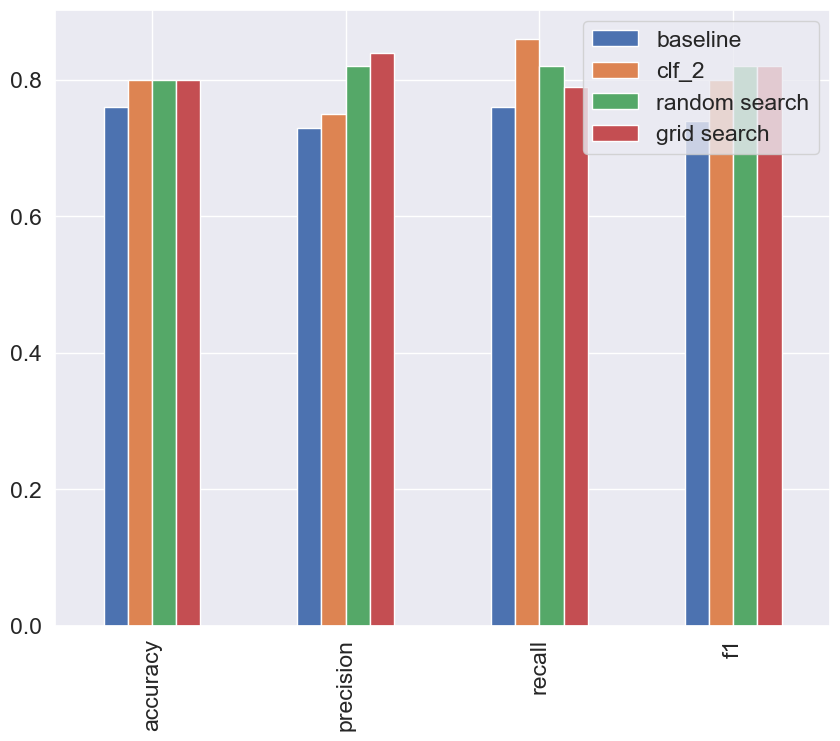

In [294]:
compare_metrics=pd.DataFrame({"baseline": baseline_metrics,
                              "clf_2":clf_2_metrics,
                              "random search": rs_metrics,
                              "grid search": gs_metrics}
                            )
compare_metrics.plot.bar(figsize=(10,8))

### 6. Saving and loading trained machine learning models

two ways to save and load machine learning models:
1. with pythons "pickel" module
2. with the joblib module

*pickle*

In [295]:
import pickle

#save an existing model to file
pickle.dump(gs_clf, open("gs_random_random_forest_model_1.pkl","wb"))

In [296]:
#load a saved model
load_pickle_model=pickle.load(open("gs_random_random_forest_model_1.pkl","rb"))

In [298]:
#make some predictions
pickle_y_preds= load_pickle_model.predict(x_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 80.33%
Precision: 0.84
Recall: 0.79
F1 score: 0.82


{'accuracy': 0.8, 'precision': 0.84, 'recall': 0.79, 'f1': 0.82}

***Joblib*** 

In [299]:
from joblib import dump, load

#save model to file
dump(gs_clf, filename="gs_random_forest_model_1.jonlib")

['gs_random_forest_model_1.jonlib']

In [300]:
#import a saved joblib model
loaded_job_model=load(filename="gs_random_forest_model_1.jonlib")

In [301]:
#make and evalate joblibb predictions
joblib_y_preds=loaded_job_model.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 80.33%
Precision: 0.84
Recall: 0.79
F1 score: 0.82


{'accuracy': 0.8, 'precision': 0.84, 'recall': 0.79, 'f1': 0.82}

### 7. Putting it all together

In [302]:
data=pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [305]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [306]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

steps we want to do (all in one cell):
1. fill missing data
2. convert data to numbers
3. build a model on the data

In [316]:
#getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#modeling f
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

#setup random seed
import numpy as np
np.random.seed(42)

#import data and drop rows with missing labels
data=pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

#defien differenet features and transformer pipeline
categorical_features=["Make","Colour"]
categorical_transformer=Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot",OneHotEncoder(handle_unknown="ignore"))])
door_feature=["Doors"]
door_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features=["Odometer (KM)"]
numeric_transformer=Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

#setup preprocessing steps (fill missing values , then convert to numberws)
preprocessor=ColumnTransformer(
                transformers=[
                    ("cat",categorical_transformer, categorical_features),
                    ("door",door_transformer, door_feature),
                    ("num", numeric_transformer, numeric_features)
                ])
#creating a preprocssing and modeling pipeline
model= Pipeline(steps=[("preprocessor", preprocessor),
                      ("model",RandomForestRegressor())])
#split data
x=data.drop("Price", axis=1)
y=data["Price"]
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

#fit and score the model
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.22188417408787875

its also possible to use "GridSearchCV" or "RandomizedSearchCV" with our Pipleline

In [321]:
#use GridSearchCV with our regression Pipeline

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": [None, 'sqrt', 'log2'],
    "model__min_samples_split": [2, 4]
}


gs_model= GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=None, model__min_samp

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': [None, 'sqrt', 'log2'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [322]:
gs_model.score(x_test, y_test)

0.2842858958755643